In [1]:
#import dependencies
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import seaborn as sds
import requests
from census import Census

# Census API Key
from config import api_key
c = Census(api_key, year=2013)

#read csv 
animal_data = pd.read_csv("IL Shelter Data 2010 to 2015 InnerJoin.csv", sep=',', encoding='latin-1')
animal_data = animal_data.fillna(0)
animal_data.head()

,index,County,Year,ShelterID,BusName,City,Zip,License Type,DogSold,PupSold,...,BegInvOther,OtherRec,OtherAdopt,OtherReclaim,OtherEuth,EndInvOther,AllRec,AllAdopt,AllReclaim,AllEuth
0,1,Carroll,2010,15,Carroll County Animal Pound,Mt. Carroll,61053,Animal Control,0,0,...,0,0,0,0,0,0,111,61,41,3
1,2,Champaign,2010,22,Rantoul Dog Pound,Rantoul,61866,Animal Control,0,0,...,0,0,0,0,0,0,13,0,0,0
2,3,Christian,2010,29,Christian County Animal Control,Taylorville,62568,Animal Control,0,0,...,0,0,0,0,0,0,271,180,56,35
3,4,Clark,2010,31,City of Casey,Casey,62420,Animal Control,0,0,...,0,0,0,0,0,0,63,0,23,0
4,5,Edgar,2010,169,Edgar County Animal Control,Paris,61944-0381,Animal Control,1,0,...,0,0,0,0,0,0,229,16,202,11


In [2]:
#Sum of Recieved, Adopted, Reclaim, and Euth
TotalRecieved = animal_data['AllRec'].sum()
TotalAdopted = animal_data['AllAdopt'].sum()
TotalReclaim = animal_data['AllReclaim'].sum()
TotalKilled = animal_data['AllEuth'].sum()

print(TotalRecieved)
print(TotalAdopted)
print(TotalReclaim)
print(TotalKilled)

526339
225642
71756
176340


<function matplotlib.pyplot.show(*args, **kw)>

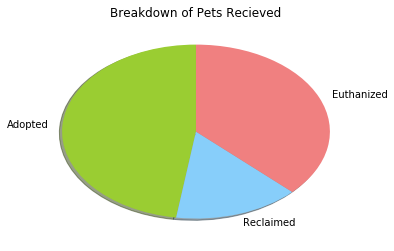

In [3]:
#Make pie graph
categories = ('Adopted',
          'Reclaimed',
          'Euthanized')
totals = [ TotalAdopted, TotalReclaim, TotalKilled]
colors = ['yellowgreen','lightskyblue','lightcoral']

fig1, ax1 = plt.subplots()
ax1.pie(totals, colors=colors, shadow = True, startangle= 90, labels=categories)
plt.title('Breakdown of Pets Recieved')

plt.savefig('piechart.png')
plt.show

In [4]:
#Breakdown by Type
DogsAdopt = animal_data['DogAdopt'].sum()
DogsReclaim = animal_data['DogReclaim'].sum()
DogsEuth = animal_data['DogEuth'].sum()

print(DogsAdopt)
print(DogsReclaim)
print(DogsEuth)

CatsAdopt = animal_data['CatsAdopt'].sum()
CatsReclaim = animal_data['CatsReclaim'].sum()
CatsEuth = animal_data['CatEuth'].sum()

print(CatsAdopt)
print(CatsReclaim)
print(CatsEuth)

OtherAdopt = animal_data['OtherAdopt'].sum()
OtherReclaim = animal_data['OtherReclaim'].sum()
OtherEuth = animal_data['OtherEuth'].sum()

print(OtherAdopt)
print(OtherReclaim)
print(OtherEuth)

132242
64481
62852
87496
6835
100565
5904
440
12923


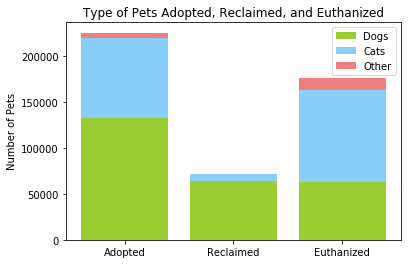

In [5]:
#Make stacked bar graph for adopted, reclaimed, and euth by ty
DogBar = [DogsAdopt, DogsReclaim, DogsEuth]
CatBar = [CatsAdopt, CatsReclaim, CatsEuth]
OtherBar = [OtherAdopt, OtherReclaim, OtherEuth]
x = np.arange(len(DogBar))

plt.bar(x, DogBar, color = 'yellowgreen', align='center', label='Dogs')
plt.bar(x, CatBar, color = 'lightskyblue', bottom=DogBar, label='Cats')
plt.bar(x, OtherBar, color = 'lightcoral', bottom = list(map(lambda x,y: x+y, DogBar, CatBar)), label='Other')

categories = ['Adopted',
             'Reclaimed',
             'Euthanized']
plt.title('Type of Pets Adopted, Reclaimed, and Euthanized')
plt.ylabel('Number of Pets')
plt.xticks(x, categories)
plt.legend(loc="best")
#plt.legend(handles=[categories])
plt.savefig('stackedbarchart.png')
plt.show()

In [6]:
#Make stacked bar graph for adopted, reclaimed, and euth by type
# totals = [ '498999', '107452', '281895']
# y_pos = np.arange(len(totals))
# categories = (
#           'TotalAdopted',
#           'TotalReclaim',
#           'TotalKilled')

# plt.bar(y_pos, totals, color = 'r', alpha = 0.5, align = 'center')
# plt.xticks(y_pos, categories)
# plt.ylabel('Number of Pets')
# plt.title('Type of Pets Adopted, Reclaimed, and Euthanized')

# plt.show

In [7]:
# 3)   Illinois trends for intake, adoption, return to owner, and euthanasia of pets
#      - adoption, return to owner, and euthanasia rates
#      - dogs, cats, others in own charts, color coded, dashed
DogAdoptYears = animal_data.groupby('Year')['DogAdopt'].sum()
DogReclaimYears = animal_data.groupby('Year')['DogReclaim'].sum()
DogEuthYears = animal_data.groupby('Year')['DogReclaim'].sum()
DogRcYears = animal_data.groupby('Year')['DogRec'].sum()
#print(DogAdoptYears, DogReclaimYears, DogEuthYears)

CatAdoptYears = animal_data.groupby('Year')['CatsAdopt'].sum()
CatReclaimYears = animal_data.groupby('Year')['CatsReclaim'].sum()
CatEuthYears = animal_data.groupby('Year')['CatEuth'].sum()
CatRcYears = animal_data.groupby('Year')['CatRec'].sum()
#print(CatAdoptYears, CatReclaimYears, CatEuthYears)

OtherAdoptYears = animal_data.groupby('Year')['OtherAdopt'].sum()
OtherReclaimYears = animal_data.groupby('Year')['OtherReclaim'].sum()
OtherEuthYears = animal_data.groupby('Year')['OtherEuth'].sum()
OtherRcYears = animal_data.groupby('Year')['OtherRec'].sum()
# print(OtherAdoptYears, OtherReclaimYears, OtherEuthYears)

SumAdoptYears = DogAdoptYears + CatAdoptYears + OtherAdoptYears
print(SumAdoptYears)

SumReclaimYears = DogReclaimYears + CatReclaimYears + OtherReclaimYears
print(SumReclaimYears)

SumEuthYears = DogEuthYears + CatEuthYears + OtherEuthYears
print(SumEuthYears)

SumRecYears = DogRcYears + CatRcYears + OtherRcYears
print(SumRecYears)

Year
2010    44868
2011    46043
2012    45673
2013    45633
2014    43425
dtype: int64
Year
2010    15713
2011    14418
2012    14076
2013    13945
2014    13604
dtype: int64
Year
2010    43541
2011    37946
2012    33205
2013    33195
2014    30082
dtype: int64
Year
2010    120418
2011    111646
2012    101328
2013     98538
2014     94409
dtype: int64


AttributeError: 'NoneType' object has no attribute 'update'

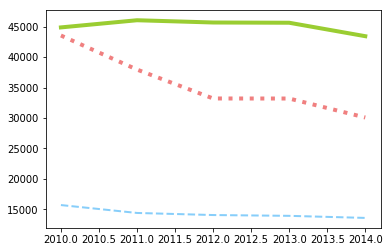

In [29]:
#Line Values 
GraphEuth = SumEuthYears
GraphReclaim = SumReclaimYears
GraphAdopt = SumAdoptYears 
GraphRec = SumRecYears

#x Values
x_pos = ['2010','2011','2012','2013','2014']

#plotting on graph
plt.plot(GraphAdopt, color='yellowgreen', linewidth=4, label='Adopted')
plt.plot(GraphReclaim, color='lightskyblue', linewidth=2, linestyle = 'dashed', label='')
plt.plot(GraphEuth, color='lightcoral', linewidth=4, linestyle = 'dotted')
#plt.plot(GraphRec, color='lightcoral', linewidth=4, linestyle = 'dotted')

#graph lables
plt.title = ('Trends Between 2012-2014')
plt.xlabel = years
plt.ylabel = ['Number of Animals']
#plt.xticks(x_pos)
#plt.xticks(np.arange(len(years)))
#Why aren't the title or labels being shown?
plt.show

# # Fake dataset
# height = [3, 12, 5, 18, 45]
# bars = ('A', 'B', 'C', 'D', 'E')
# y_pos = np.arange(len(bars))
 
# # Create bars and choose color
# plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# # Add title and axis names
# plt.title('My title')
# plt.xlabel('categories')
# plt.ylabel('values')
 
# # Limits for the Y axis
# plt.ylim(0,60)
 
# # Create names
# plt.xticks(y_pos, bars)
 
# # Show graphic
# plt.show()

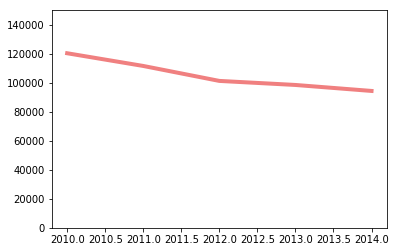

In [25]:
#Graph for Dogs
# DogAdoptYears = animal_data.groupby('Year')['DogAdopt'].sum()
# DogReclaimYears = animal_data.groupby('Year')['DogReclaim'].sum()
# DogEuthYears = animal_data.groupby('Year')['DogReclaim'].sum()
# print(DogAdoptYears, DogReclaimYears, DogEuthYears)

plt.plot(GraphRec, color='lightcoral', linewidth=4)

plt.ylim(0,150000)
#plt.xticks(np.arange(len(years)), years)
plt.show()

In [10]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area": "Zip"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["Zip", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate"]]


# Visualize
print(len(census_pd))
census_pd.head()

33120


,Zip,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,00601,18450.0,36.6,12041.0,7380.0,10816.0,58.623306
1,00602,41302.0,38.6,15663.0,8463.0,22409.0,54.256452
2,00603,53683.0,38.9,15485.0,9176.0,26220.0,48.842278
3,00606,6591.0,37.3,15019.0,6383.0,3721.0,56.455773
4,00610,28963.0,39.2,16707.0,7892.0,14569.0,50.302110


In [11]:
ShelterCensusMerge = pd.merge(animal_data, census_pd, on='Zip')
ShelterCensusMerge.dtypes

index                  int64
County                object
Year                   int64
ShelterID              int64
BusName               object
City                  object
Zip                   object
License Type          object
DogSold                int64
PupSold                int64
CatSold                int64
KitSold                int64
ExoticSold             int64
BegInvDog              int64
DogRec                 int64
DogAdopt               int64
DogReclaim             int64
DogEuth                int64
EndInvDogs             int64
BegInvCat              int64
CatRec                 int64
CatsAdopt              int64
CatsReclaim            int64
CatEuth                int64
EndInvCats             int64
BegInvOther            int64
OtherRec               int64
OtherAdopt             int64
OtherReclaim           int64
OtherEuth              int64
EndInvOther           object
AllRec                 int64
AllAdopt               int64
AllReclaim             int64
AllEuth       

<function matplotlib.pyplot.show(*args, **kw)>

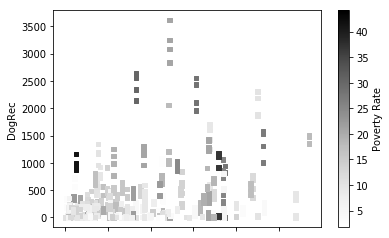

In [12]:
ShelterCensusMerge.plot.scatter(x='Population', y='DogRec', c='Poverty Rate', marker='s')
#sds.lmplot(x='Population',y='DogRec',data=ShelterCensusMerge,fit_reg=True)


#graph lables
plt.title = ("Dogs Recieved per Population and Poverty Rate")
plt.xlabel = ("Population")
plt.ylabel = ("Number Number of Dogs (intake) per shelter")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

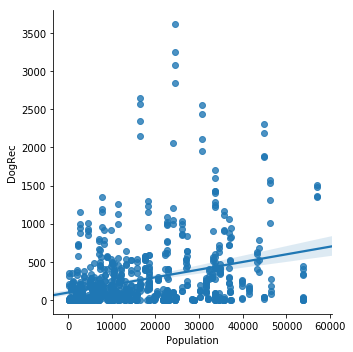

In [13]:
sds.lmplot(x='Population',y='DogRec',data=ShelterCensusMerge,fit_reg=True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

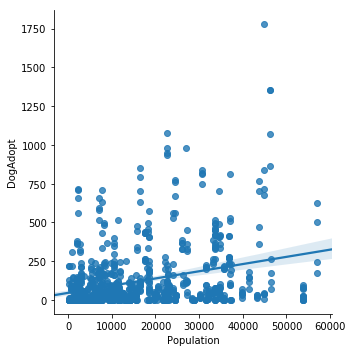

In [14]:
sds.lmplot(x='Population',y='DogAdopt',data=ShelterCensusMerge,fit_reg=True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

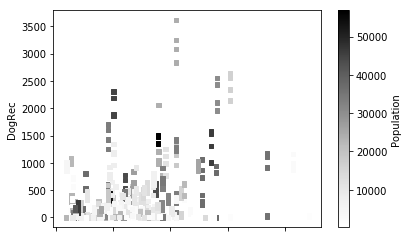

In [15]:
ShelterCensusMerge.plot.scatter(x='Poverty Rate', y='DogRec', c='Population', marker='s')
#sds.lmplot(x='Population',y='DogRec',data=ShelterCensusMerge,fit_reg=True)


#graph lables


plt.show



<function matplotlib.pyplot.show(*args, **kw)>

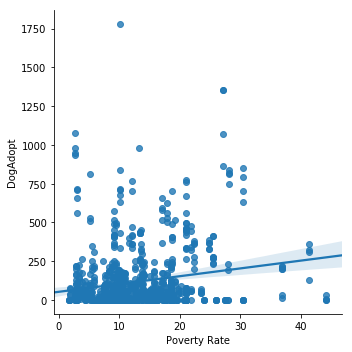

In [16]:
sds.lmplot(x='Poverty Rate',y='DogAdopt',data=ShelterCensusMerge,fit_reg=True)
plt.show

TypeError: 'str' object is not callable

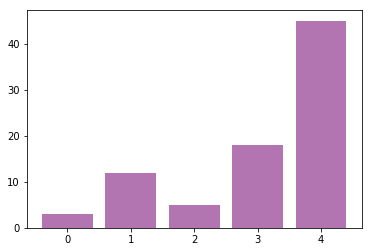

In [21]:
# Fake dataset
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('My title')
plt.xlabel('categories')
plt.ylabel('values')
 
# Limits for the Y axis
plt.ylim(0,60)
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()
